    Unnamed: 0      Species  Length  Width  Length/Width  Tip Length  \
0            1        Betel    14.5    9.3          1.56         2.0   
1            2        Betel    15.6   11.3          1.38         1.8   
2            3       Pepper    14.7   10.0          1.47         0.5   
3            4        Betel    12.1    8.5          1.42         1.1   
4            5        Betel    12.9    8.3          1.55         1.0   
..         ...          ...     ...    ...           ...         ...   
70          71  Long Pepper    12.4    9.9          1.25         0.6   
71          72        Betel    14.0   10.2          1.37         1.1   
72          73  Long Pepper    11.7    8.9          1.31         0.5   
73          74        Betel    13.8    8.1          1.70         1.1   
74          75  Long Pepper    11.1    9.2          1.21         0.5   

    Base Angle  No:of Veins  Petiole Length  
0          336            8             1.1  
1          267            8             3.1

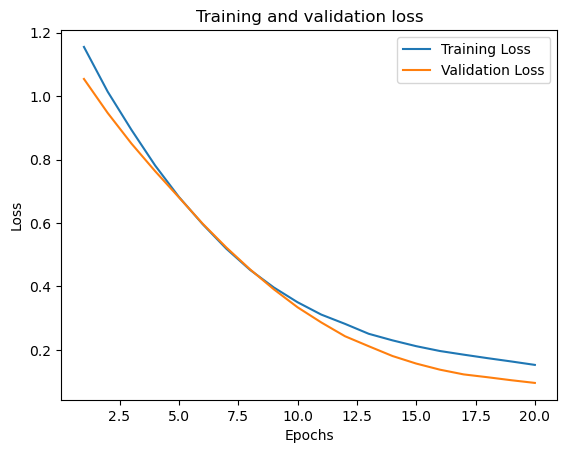

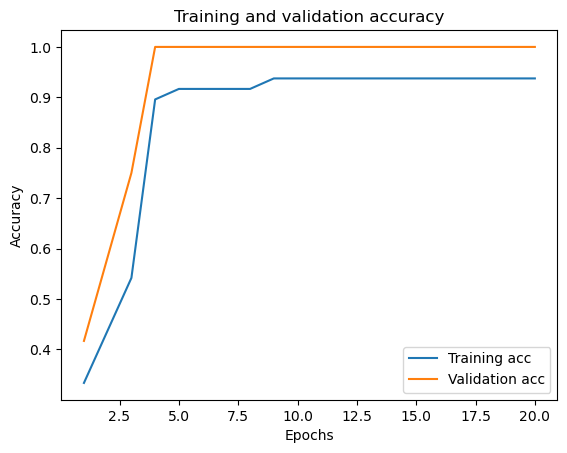

1/1 [==============================] - 0s 31ms/step - loss: 0.0790 - accuracy: 1.0000
Test accuracy: 1.0
1/1 [==============================] - 0s 84ms/step
First 10 predictions and their classified class:
Prediction 1: [0.99516565 0.00145002 0.00338424], Classified as: 0
Prediction 2: [0.9823795  0.00630173 0.01131862], Classified as: 0
Prediction 3: [0.01927449 0.06174013 0.9189854 ], Classified as: 2
Prediction 4: [9.9983144e-01 3.9232375e-05 1.2929749e-04], Classified as: 0
Prediction 5: [9.6111721e-04 9.9892503e-01 1.1386049e-04], Classified as: 1
Prediction 6: [0.01480431 0.03721545 0.94798017], Classified as: 2
Prediction 7: [0.02797778 0.0374424  0.9345798 ], Classified as: 2
Prediction 8: [0.98444164 0.00884931 0.00670901], Classified as: 0
Prediction 9: [0.01026208 0.94497263 0.04476532], Classified as: 1
Prediction 10: [0.01396236 0.03534245 0.95069516], Classified as: 2

First 10 predictions, their classified results, and labels:
Prediction 1: [0.99516565 0.00145002 0.00338

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the data from CSV file
data = pd.read_csv('treeDatasett.csv')
print(data)

# Encode the target labels
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

# Separate features and target
X = data.drop('Species', axis=1).values
y = data['Species'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target to categorical
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.5))  # Dropout layer for regularization
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))  # Dropout layer for regularization
# model.add(Dense(y.shape[1], activation='softmax'))

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])


# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.2)

# Plot training and validation loss
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
plt.plot(epochs, history.history['accuracy'], label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Save the model
# model.save('.h5')

# Load the model (if needed)
# from tensorflow.keras.models import load_model
# model = load_model('tree_species_classifier.h5')

# Make predictions
predictions = model.predict(X_test)

# Slice to get the first 10 predictions
first_10_predictions = predictions[:10]

# Apply threshold to determine class
predicted_classes = np.argmax(first_10_predictions, axis=1)

# Print the first 10 predictions and their classified class
print("First 10 predictions and their classified class:")
for i, pred in enumerate(first_10_predictions):
    print(f"Prediction {i+1}: {pred}, Classified as: {predicted_classes[i]}")

# Map numeric class to descriptive label
descriptive_labels = label_encoder.inverse_transform(predicted_classes)

# Print the first 10 predictions, their classified results, and labels
print("\nFirst 10 predictions, their classified results, and labels:")
for i, pred in enumerate(first_10_predictions):
    print(f"Prediction {i+1}: {pred}, Classified as: {predicted_classes[i]}, Label: {descriptive_labels[i]}")
